In [1]:
import datetime
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Obtenez l'ensemble de données sur le logement en Californie
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing; # est téléchargé sous forme de dictionnaire

In [4]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 4. Évaluer un modèle

Une fois que vous avez formé un modèle, vous aurez besoin d'un moyen de mesurer la fiabilité de ses prédictions.

Dans l'ensemble, l'idée principale de l'évaluation d'un modèle est de **comparer les prédictions du modèle à ce qu'elles auraient idéalement dû être** (les étiquettes de vérité).

Scikit-Learn implémente 3 méthodes différentes d'évaluation des modèles.

1. La méthode `score()`. L'appel de `score()` sur une instance de modèle renverra une métrique associée au type de modèle que vous utilisez. La métrique dépend du modèle que vous utilisez.
2. Le paramètre « scoring ». Ce paramètre peut être transmis à des méthodes telles que [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) ou [` GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) pour indiquer à Scikit-Learn d'utiliser un type spécifique de métrique de notation.
3. Fonctions métriques spécifiques au problème disponibles dans [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). De la même manière que le paramètre « scoring » peut être transmis à différentes fonctions de notation, Scikit-Learn les implémente en tant que fonctions autonomes.

La fonction de notation que vous utiliserez dépendra également du problème sur lequel vous travaillez.

Les problèmes de classification ont des mesures d'évaluation et des fonctions de notation différentes des problèmes de régression.

Regardons quelques exemples.

### 4.1 Évaluation générale du modèle avec `score()`

Si nous réduisons le code de notre problème de classification précédent (construire un classificateur pour prédire si une personne souffre ou non d'une maladie cardiaque en fonction de son dossier médical).

Nous pouvons voir la méthode `score()` entrer en jeu.

In [5]:
# Importez la classe modèle RandomForestClassifier depuis le module ensemble
from sklearn.ensemble import RandomForestClassifier

# Configurer une graine aléatoire
np.random.seed(42)

# Divisez les données en X (caractéristiques/données) et y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Divisé en ensembles de train et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instancier le modèle (sur l'ensemble d'entraînement)
clf = RandomForestClassifier(n_estimators=100)

# Appelez la méthode d'ajustement sur le modèle et transmettez-lui les données d'entraînement
clf.fit(X_train, y_train);

Une fois que le modèle a été ajusté sur les données d'entraînement (`X_train`, `y_train`), nous pouvons appeler la méthode `score()` dessus et évaluer notre modèle sur les données de test, des données que le modèle n'a jamais vues auparavant (` X_test`, `y_test`).

In [6]:
# Vérifier le score du modèle (sur l'ensemble de test)
clf.score(X_test, y_test)

0.8524590163934426

Chaque modèle dans Scikit-Learn implémente une métrique par défaut pour « score() » qui convient au problème.

Par exemple:
* Les modèles de classificateur utilisent généralement [`metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) comme « score » par défaut. ()` métrique.
* Les modèles de régression utilisent généralement [`metrics.r2_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) comme métrique `score()` par défaut.
* Il existe bien d'autres [classifications](https://scikit-learn.org/stable/modules/classes.html#classification-metrics) et [régressions](https://scikit-learn.org/stable/modules/classes .html#regression-metrics) métriques spécifiques implémentées dans `sklearn.metrics`.

Parce que `clf` est une instance de `RandomForestClassifier`, la méthode `score()` utilise la précision moyenne comme méthode de score.

Vous pouvez le trouver en appuyant sur **SHIFT + TAB** (dans un bloc-notes Jupyter, peut être différent ailleurs) entre parenthèses de `score()` lorsqu'il est appelé sur une instance de modèle.

En coulisses, `score()` fait des prédictions sur `X_test` à l'aide du modèle entraîné, puis compare ces prédictions aux étiquettes réelles `y_test`.

Un modèle de classification qui prédit tout ce qui est correct à 100 % recevrait un score de précision de 1,0 (ou 100 %).

Notre modèle ne donne pas tout ce qu'il faut, mais avec une précision d'environ 85 % (0,85 * 100), c'est toujours bien mieux que de deviner.

Faisons de même mais avec le code de régression ci-dessus.

In [7]:
# Importez la classe modèle RandomForestRegressor depuis le module ensemble
from sklearn.ensemble import RandomForestRegressor

# Configurer une graine aléatoire
np.random.seed(42)

# Divisez les données en fonctionnalités (X) et étiquettes (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Divisé en ensembles de train et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instaurer et ajuster le modèle (sur l'ensemble d'entraînement)
model = RandomForestRegressor()
model.fit(X_train, y_train);

En raison de la conception cohérente de la bibliothèque Scikit-Learn, nous pouvons appeler la même méthode `score()` sur `model`.

In [8]:
# Vérifier le score du modèle (sur l'ensemble de test)
model.score(X_test, y_test)

0.8066196804802649

Ici, `model` est une instance de [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

Et comme il s'agit d'un modèle de régression, la métrique par défaut intégrée à `score()` est le coefficient de détermination ou R^2 (prononcé R-sqaured).

N'oubliez pas que vous pouvez le trouver en appuyant sur **SHIFT + TAB** entre parenthèses de `score()` lorsqu'il est appelé sur une instance de modèle.

La meilleure valeur possible ici est 1,0, cela signifie que le modèle prédit exactement les valeurs de régression cibles.

Appeler la méthode `score()` sur n'importe quelle instance de modèle et lui transmettre des données de test est un bon moyen rapide de voir comment évolue votre modèle.

Cependant, lorsque vous approfondissez un problème, vous souhaiterez probablement commencer à utiliser des métriques plus puissantes pour évaluer les performances de vos modèles.

### 4.2 Évaluer vos modèles à l'aide du paramètre `scoring`

La prochaine étape après l'utilisation de `score()` consiste à utiliser un paramètre `scoring` personnalisé avec [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score .html#sklearn.model_selection.cross_val_score) ou [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Comme vous l'avez peut-être deviné, le paramètre « score » que vous définissez sera différent en fonction du problème sur lequel vous travaillez.

Nous verrons quelques exemples spécifiques de différents paramètres dans un instant, mais regardons d'abord `cross_val_score()`.

Pour ce faire, nous copierons le code de classification des maladies cardiaques ci-dessus, puis ajouterons une autre ligne en haut.

In [9]:
# Importez cross_val_score depuis le module model_selection
from sklearn.model_selection import cross_val_score

# Importez la classe modèle RandomForestClassifier depuis le module ensemble
from sklearn.ensemble import RandomForestClassifier

# Configurer une graine aléatoire
np.random.seed(42)

# Divisez les données en X (caractéristiques/données) et y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Divisé en ensembles de train et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instancier le modèle (sur l'ensemble d'entraînement)
clf = RandomForestClassifier(n_estimators=100)

# Appelez la méthode d'ajustement sur le modèle et transmettez-lui les données d'entraînement
clf.fit(X_train, y_train);

L'utilisation de `cross_val_score()` est légèrement différente de `score()`.

Voyons d'abord un exemple de code, puis nous passerons en revue les détails.

In [10]:
# Utilisant score()
clf.score(X_test, y_test)

0.8524590163934426

In [11]:
# Utilisant cross_val_score()
cross_val_score(clf, X, y, cv=5) # cv = number of splits to test (5 by default)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

Qu'est-ce qu'il se passe ici?

La première différence que vous remarquerez peut-être est que `cross_val_score()` renvoie un tableau alors que `score()` ne renvoie qu'un seul nombre.

`cross_val_score()` renvoie un tableau grâce à un paramètre appelé `cv`, qui signifie validation croisée.

Lorsque `cv` n'est pas défini, `cross_val_score()` renverra un tableau de 5 nombres par défaut (`cv=None` équivaut à définir `cv=5`).

N'oubliez pas que vous pouvez voir les paramètres d'une fonction en utilisant **SHIFT + TAB** (à l'intérieur d'un bloc-notes Jupyter) entre parenthèses.

Mais attendez, vous vous demandez peut-être ce qu'est la validation croisée ?

Un visuel pourrait peut-être aider.

<img src='../docs/images/sklearn-cross-validation.png' width=600/>

Nous avons traité la figure 1.0 avant d'utiliser `score(X_test, y_test)`.

Mais en y regardant de plus près, si un modèle est entraîné à l'aide des données d'entraînement ou de 80 % des échantillons, cela signifie que 20 % des échantillons ne sont pas utilisés pour que le modèle apprenne quoi que ce soit.

Cela signifie également qu'en fonction des 80 % utilisés pour l'entraînement et des 20 % utilisés pour évaluer le modèle, celui-ci peut obtenir un score qui ne reflète pas l'ensemble des données.

Par exemple, si de nombreux exemples simples se trouvent dans les données d'entraînement à 80 %, lorsqu'il s'agit de tester sur les 20 %, votre modèle risque de mal fonctionner.

Il en va de même pour l'inverse.

La figure 2.0 montre la validation croisée 5 fois, une méthode qui tente de fournir une solution à :

1. Ne pas former sur toutes les données (en gardant toujours les ensembles de formation et de test séparés).
2. Éviter d'obtenir des scores chanceux sur des fractionnements uniques des données.

Au lieu de s'entraîner uniquement sur 1 fractionnement de formation et d'évaluer sur 1 fractionnement de test, la validation croisée 5 fois le fait 5 fois.

Sur un partage différent à chaque fois, renvoyant un score pour chacun.

Pourquoi 5 fois ?

Le nom réel de cette configuration de validation croisée K-fold. Où K est un nombre arbitraire. Nous avons utilisé 5 car il est joli visuellement et c'est la valeur par défaut dans [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score. html).

La figure 2.0 montre ce qui se passe lorsque nous exécutons ce qui suit.

In [12]:
# 5-fold cross-validation
cross_val_score(clf, X, y, cv=5) # cv is equivalent to K

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

Puisque nous définissons `cv=5` (validation croisée 5 fois), nous récupérons 5 scores différents au lieu de 1.

Prendre la moyenne de ce tableau nous donne une idée plus approfondie des performances de notre modèle en convertissant les 5 scores en un seul.

In [13]:
np.random.seed(42)

# Formation unique et score partagé de test
clf_single_score = clf.score(X_test, y_test)

# Prenez la moyenne 5-fold cross-validation
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

Remarquez que la moyenne `cross_val_score()` est légèrement inférieure à la valeur unique renvoyée par `score()`.

Dans ce cas, si on vous demandait de signaler la précision de votre modèle, même si elle est inférieure, vous préféreriez la métrique à validation croisée à la métrique non validée de manière croisée.

Attendez?

Nous n'avons pas du tout utilisé le paramètre `scoring`.

Par défaut, il est défini sur « Aucun ».

In [14]:
cross_val_score(clf, X, y, cv=5, scoring=None) # valeur de notation par défaut, elle peut être définie sur d'autres mesures de notation

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

> **Remarque :** Si vous remarquez des scores différents à chaque fois que vous appelez `cross_val_score`, c'est parce que chaque répartition des données est aléatoire à chaque fois. Ainsi, le modèle peut obtenir des scores plus élevés/inférieurs sur différentes divisions des données. Pour obtenir des scores reproductibles, vous pouvez définir la valeur de départ aléatoire.

Lorsque `scoring` est défini sur `None` (par défaut), il utilise la même métrique que `score()` quel que soit le modèle transmis à `cross_val_score()`.

Dans ce cas, notre modèle est `clf` qui est une instance de `RandomForestClassifier` qui utilise la précision moyenne comme métrique `score()` par défaut.

Vous pouvez modifier le score d'évaluation utilisé par `cross_val_score()` en modifiant le paramètre `scoring`.

Et comme vous l’avez peut-être deviné, différents problèmes nécessitent des scores d’évaluation différents.

La [documentation Scikit-Learn](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) décrit une vaste gamme de mesures d'évaluation pour différents problèmes, mais examinons-en quelques-unes.

### 4.2.1 Métriques d'évaluation du modèle de classification

Quatre des principales mesures/méthodes d'évaluation que vous rencontrerez pour les modèles de classification sont :

1. [Précision](https://developers.google.com/machine-learning/crash-course/classification/accuracy)
2. [Zone sous la courbe ROC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) (courbe caractéristique de fonctionnement du récepteur)
3. [Matrice de confusion](https://en.wikipedia.org/wiki/Confusion_matrix)
4. [Rapport de classification](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

Jetons un coup d'oeil à chacun d'eux. Nous allons descendre le code de classification ci-dessus pour passer en revue quelques exemples.

In [15]:
# Importez cross_val_score depuis le module model_selection
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

#### Précision
La précision est la métrique par défaut pour la fonction `score()` dans chacun des modèles de classificateur de Scikit-Learn. Et c’est probablement la métrique que vous verrez le plus souvent utilisée pour les problèmes de classification.

Cependant, nous verrons dans une seconde que ce n’est pas toujours la meilleure métrique à utiliser.

Scikit-Learn renvoie la précision sous forme décimale, mais vous pouvez facilement la convertir en pourcentage.

In [16]:
# Précision/Accuracy en pourcentage
print(f"Heart Disease Classifier Accuracy: {clf.score(X_test, y_test) * 100:.2f}%")

Heart Disease Classifier Accuracy: 85.25%


#### Surface sous la courbe des caractéristiques de fonctionnement du récepteur (ROC)
Si celui-ci ressemble à une bouchée, c’est parce que lire le nom complet l’est.

On l'appelle généralement AUC pour Area Under Curve et la courbe dont ils parlent est la caractéristique de fonctionnement du récepteur ou ROC en abrégé.

Donc, si vous entendez quelqu'un parler d'AUC ou de ROC, il parle probablement de ce qui suit.

Les courbes ROC sont une comparaison du taux de vrais positifs (tpr) par rapport au taux de faux positifs (fpr).

Pour plus de clarté:
* Vrai positif = le modèle prédit 1 lorsque la vérité est 1
* Faux positif = le modèle prédit 1 alors que la vérité est 0
* Vrai négatif = le modèle prédit 0 lorsque la vérité est 0
* Faux négatif = le modèle prédit 0 lorsque la vérité est 1

Maintenant que nous le savons, voyons-en un. Scikit-Learn vous permet de calculer les informations requises pour une courbe ROC à l'aide du [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve ) fonction.

In [17]:
from sklearn.metrics import roc_curve

# Faites des prédictions avec des probabilités
y_probs = clf.predict_proba(X_test)

# Conserver uniquement les probabilités de la classe positive
y_probs = y_probs[:, 1]

# Calculer fpr, tpr et seuils
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Vérifiez le taux de faux positifs
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

Les regarder seuls n’a pas beaucoup de sens. Il est beaucoup plus facile de voir leur valeur visuellement.

Créons une fonction d'assistance pour créer une courbe ROC étant donné les taux de faux positifs (`fpr`) et de vrais positifs (`tpr`).

> **Remarque :** Depuis Scikit-Learn 1.2+, il existe une fonctionnalité permettant de tracer une courbe ROC. Vous pouvez le trouver sous [`sklearn.metrics.RocCurveDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn-metrics-roccurvedisplay).

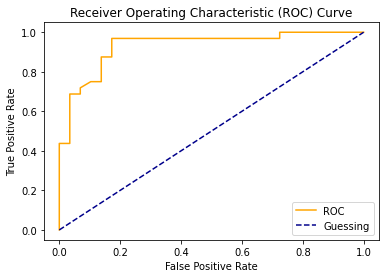

In [18]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Tracé la courbe ROC
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Ligne de tracé sans pouvoir prédictif (référence)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customisez le graph
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

En regardant l’intrigue pour la première fois, cela peut paraître un peu déroutant.

La principale chose à retenir ici est que notre modèle fait bien mieux que deviner.

Une métrique que vous pouvez utiliser pour quantifier la courbe ROC en un seul nombre est l'AUC (Area Under Curve).

Scikit-Learn implémente une fonction pour calculer cela appelée [`sklearn.metrics.roc_auc_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) .

Le score ROC AUC maximum que vous pouvez atteindre est de 1,0 et généralement, plus il est proche de 1,0, meilleur est le modèle.

In [19]:
from sklearn.metrics import roc_auc_score

roc_auc_score_value = roc_auc_score(y_test, y_probs)
roc_auc_score_value

0.9304956896551724

Bien qu'il s'agisse d'une bonne pratique, nous n'avons pas réellement eu besoin de créer notre propre fonction `plot_roc_curve`.

Scikit-Learn nous permet de tracer une courbe ROC directement à partir de notre estimateur/modèle en utilisant la méthode de classe [`sklearn.metrics.RocCurveDisplay.from_estimator`](https://scikit-learn.org/stable/modules/generated/sklearn .metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_estimator) et en lui transmettant nos `estimateur`, `X_test` et `y_test`.

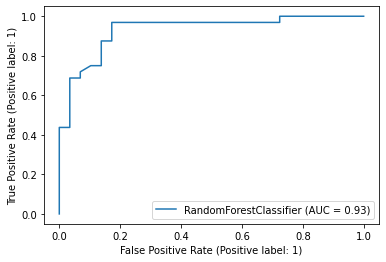

In [20]:
from sklearn.metrics import RocCurveDisplay
roc_curve_display = RocCurveDisplay.from_estimator(estimator=clf, 
                                                   X=X_test, 
                                                   y=y_test)

La position la plus idéale pour qu’une courbe ROC s’étende le long du coin supérieur gauche du tracé.

Cela signifierait que le modèle prédit uniquement les vrais positifs et aucun faux positif. Et cela donnerait un score ROC AUC de 1,0.

Vous pouvez le voir en créant une courbe ROC en utilisant uniquement les étiquettes « y_test ».

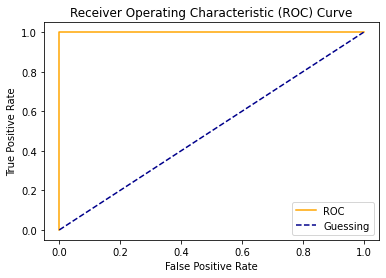

In [21]:
# Tracé une courbe ROC parfaite
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [22]:
# Score ROC AUC parfait
roc_auc_score(y_test, y_test)

1.0

#### Matrice de confusion

Une autre façon fantastique d'évaluer un modèle de classification consiste à utiliser une [matrice de confusion](https://en.wikipedia.org/wiki/Confusion_matrix).

Une matrice de confusion est un moyen rapide de comparer les étiquettes prédites par un modèle et les étiquettes réelles qu’il était censé prédire.

Essentiellement, cela vous donne une idée de la confusion dans le modèle.

In [23]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

Encore une fois, c'est probablement plus facile à visualiser.

Une façon de le faire est d'utiliser `pd.crosstab()`.

In [24]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


#### Création d'une matrice de confusion à l'aide de Scikit-Learn

Scikit-Learn a plusieurs implémentations différentes de tracé de matrices de confusion :

1. [`sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay .from_estimator) - cela prend un estimateur ajusté (comme notre modèle `clf`), des caractéristiques (`X`) et des étiquettes (`y`), il utilise ensuite l'estimateur entraîné pour faire des prédictions sur `X` et compare les prédictions à `y` en affichant une matrice de confusion.
2. [`sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions ) - cela prend les étiquettes de vérité et les étiquettes prédites et les compare en affichant une matrice de confusion.

> **Remarque :** Ces deux méthodes/classes nécessitent Scikit-Learn 1.0+. Pour vérifier votre version de Scikit-Learn, exécutez :
```python
importer Sklearn
sklearn.__version__
```
> Si vous n'avez pas la version 1.0+, vous pouvez effectuer la mise à niveau sur : https://scikit-learn.org/stable/install.html

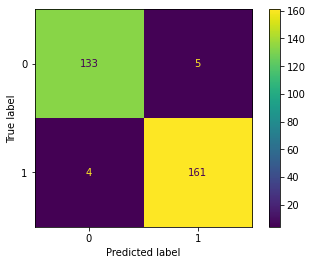

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

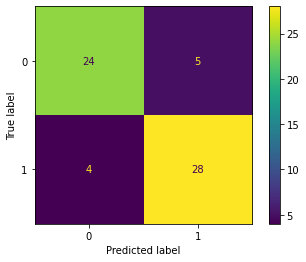

In [26]:
# Tracez la matrice de confusion à partir des prédictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

#### Rapport de classement

La dernière mesure majeure à prendre en compte lors de l'évaluation d'un modèle de classification est un rapport de classification.

Un rapport de classification est davantage un ensemble de mesures qu’une seule.

Vous pouvez créer un rapport de classification à l'aide de la méthode [sklearn.metrics.classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) de Scikit-Learn.

Voyons-en un.

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Il renvoie quatre colonnes : précision, rappel, score f1 et support.

Le nombre de lignes dépend du nombre de classes différentes. Mais il y aura toujours trois lignes de précision d'étiquette, de moyenne macro et de moyenne pondérée.

Chaque terme mesure quelque chose de légèrement différent :
* **Précision** - Indique la proportion d'identifications positives (classe « 1 prédite par le modèle) qui étaient réellement correctes. Un modèle qui ne produit aucun faux positif a une précision de 1,0.
* **Rappel** - Indique la proportion de positifs réels qui ont été correctement classés. Un modèle qui ne produit aucun faux négatif a un rappel de 1,0.
* **Score F1** - Une combinaison de précision et de rappel. Un modèle parfait obtient un score F1 de 1,0.
* **Support** - Le nombre d'échantillons sur lesquels chaque métrique a été calculée.
* **Précision** - La précision du modèle sous forme décimale. La précision parfaite est égale à 1,0, ce qui signifie que la prédiction est correcte dans 100 % des cas.
* **Macro avg** - Abréviation de macro moyenne, la précision moyenne, le rappel et le score F1 entre les classes. La macro moyenne ne prend pas en compte le déséquilibre des classes. Donc, si vous avez des déséquilibres de classe (plus d’exemples d’une classe que d’une autre), vous devez y prêter attention.
* **Moyenne pondérée** - Abréviation de moyenne pondérée, la précision moyenne pondérée, le rappel et le score F1 entre les classes. Pondéré signifie que chaque métrique est calculée en fonction du nombre d'échantillons qu'il y a dans chaque classe. Cette métrique favorisera la classe majoritaire (par exemple, elle donnera une valeur élevée lorsqu'une classe en surpassera une autre en raison du plus grand nombre d'échantillons).

Quand devriez-vous utiliser chacun d’eux ?

Il peut être tentant de baser les performances de vos modèles de classification uniquement sur la précision. Et la précision est une bonne mesure à signaler, sauf lorsque vous avez des classes très déséquilibrées.

Par exemple, disons qu'il y avait 10 000 personnes. Et 1 d’entre eux avait une maladie. Il vous est demandé de construire un modèle pour prédire qui en est atteint.

Vous construisez le modèle et constatez que votre modèle est précis à 99,99 %. Ce qui semble génial !
...jusqu'à ce que vous vous en rendiez compte, tout ce qu'il fait, c'est prédire que personne ne sera atteint de la maladie, en d'autres termes, les 10 000 prédictions sont fausses.

Dans ce cas, vous voudriez vous tourner vers des mesures telles que la précision, le rappel et le score F1.

In [28]:
# Où la précision et le rappel deviennent précieux
disease_true = np.zeros(10000)
disease_true[0] = 1 # seulement 1 cas

disease_preds = np.zeros(10000) # toute les prédiction sont 0
pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


Vous pouvez voir ici, nous avons une précision de 0,9999 (99,99%), une grande précision et rappel sur la classe 0,0 mais rien pour la classe 1,0.

Demandez-vous : même si le modèle atteint une précision de 99,99 %, est-il utile ?

Résumer:
* La précision est une bonne mesure pour commencer si toutes les classes sont équilibrées (par exemple, la même quantité d'échantillons étiquetés avec 0 ou 1)
* La précision et le rappel deviennent plus importants lorsque les cours sont déséquilibrés.
* Si les prédictions faussement positives sont pires que les fausses négatives, visez une plus grande précision.
* Si les prédictions faussement négatives sont pires que les fausses positives, visez un rappel plus élevé.

> **Ressource :** Pour en savoir plus sur la précision, le rappel et les compromis entre eux, je suggère de consulter le [guide Scikit-Learn Precision-Recall](https://scikit-learn.org/stable/auto_examples/ model_selection/plot_precision_recall.html).

### 4.2.2 Métriques d'évaluation du modèle de régression

Semblable à la classification, il existe [plusieurs métriques que vous pouvez utiliser pour évaluer vos modèles de régression](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

Nous allons vérifier ce qui suit.

1. **R^2 (prononcé r-carré) ou coefficient de détermination** - Compare les prédictions de vos modèles à la moyenne des cibles. Les valeurs peuvent aller de l'infini négatif (un modèle très médiocre) à 1. Par exemple, si votre modèle ne fait que prédire la moyenne des cibles, sa valeur R^2 serait de 0. Et si votre modèle prédit parfaitement une plage de nombres sa valeur R ^ 2 serait de 1. Plus c'est élevé, mieux c'est.
2. **Erreur absolue moyenne (MAE)** - La moyenne des différences absolues entre les prédictions et les valeurs réelles. Cela vous donne une idée de l’erreur de vos prédictions. Plus bas, c'est mieux.
3. **Erreur quadratique moyenne (MSE)** - Les différences quadratiques moyennes entre les prédictions et les valeurs réelles. La mise au carré des erreurs supprime les erreurs négatives. Cela amplifie également les valeurs aberrantes (échantillons qui comportent des erreurs plus importantes). Plus bas, c'est mieux.

Voyons-les en action. Tout d’abord, nous allons à nouveau supprimer notre code de modèle de régression.

In [29]:
# Importez la classe modèle RandomForestRegressor depuis le module ensemble
from sklearn.ensemble import RandomForestRegressor

# Configurer une graine aléatoire
np.random.seed(42)

# Diviser les données en fonctionnalités (X) et étiquettes (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Divisé en ensembles de train et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instaurer et ajuster le modèle (sur l'ensemble d'entraînement)
model = RandomForestRegressor()
model.fit(X_train, y_train);

**Score R^2 (coefficient de détermination)**

Une fois que vous disposez d'un modèle de régression entraîné, la métrique d'évaluation par défaut dans la fonction `score()` est R^2.

In [30]:
# Calculer le score R^2 du modèle
model.score(X_test, y_test)

0.8066196804802649

En dehors de la fonction `score()`, R^2 peut être calculé à l'aide de [`r2_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score. html#sklearn.metrics.r2_score).

Un modèle qui prédit uniquement la moyenne obtiendrait un score de 0.

In [31]:
from sklearn.metrics import r2_score

# Remplir un tableau avec la moyenne y_test
y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

0.0

Et un modèle parfait obtiendrait une note de 1.

In [32]:
r2_score(y_test, y_test)

1.0

Pour vos modèles de régression, vous souhaiterez maximiser R ^ 2, tout en minimisant MAE et MSE.

**Erreur absolue moyenne (MAE)**

L'erreur absolue moyenne d'un modèle peut être calculée avec la méthode [`sklearn.metrics.mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) de Scikit-Learn.

In [33]:
# Erreur absolue moyenne
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

Notre modèle atteint un MAE de 0,327.

Cela signifie qu'en moyenne, les prévisions de nos modèles sont éloignées de 0,327 unité de la valeur réelle.

Rendons cela un peu plus visuel.

In [34]:
df = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_preds})

df

,actual values,predictions
20046,0.47700,0.493840
3024,0.45800,0.754940
15663,5.00001,4.928596
20484,2.18600,2.540290
9814,2.78000,2.331760
...,...,...
15362,2.63300,2.220380
16623,2.66800,1.947760
18086,5.00001,4.836378
2144,0.72300,0.717820


Vous pouvez voir que les prévisions sont légèrement différentes des valeurs réelles.

Selon le problème sur lequel vous travaillez, avoir une différence comme nous le faisons actuellement peut être acceptable. D’un autre côté, cela pourrait ne pas aller non plus, ce qui signifie que les prédictions devraient être plus proches.

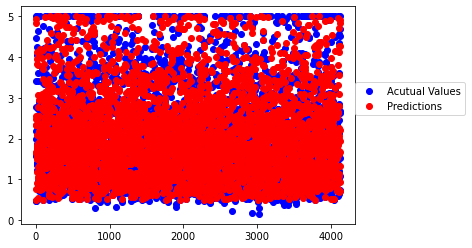

In [35]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["actual values"], c='b', label="Acutual Values")
ax.scatter(x, df["predictions"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

**Erreur quadratique moyenne (MSE)**

Et le MSE ?

Nous pouvons le calculer avec [`sklearn.metrics.mean_squared_error`] de Scikit-Learn(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

In [36]:
# Erreur quadratique moyenne
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

Le MSE sera souvent supérieur au MAE car il correspond au carré des erreurs plutôt que de prendre uniquement en compte la différence absolue.

Maintenant, vous vous demandez peut-être quelle métrique d’évaluation de régression devriez-vous utiliser ?

* R^2 est similaire à la précision. Cela vous donne une indication rapide des performances possibles de votre modèle. Généralement, plus votre valeur R^2 est proche de 1,0, meilleur est le modèle. Mais cela ne dit pas vraiment à quel point votre modèle est erroné en termes d'écart avec chaque prédiction.
* MAE donne une meilleure indication de l'écart moyen entre chacune des prédictions de votre modèle.
* Quant au MAE ou au MSE, en raison de la façon dont le MSE est calculé, mettant au carré les différences entre les valeurs prédites et les valeurs réelles, il amplifie les différences plus importantes. Disons que nous prédisons la valeur des maisons (ce que nous faisons).
     * Faites plus attention au MAE : lorsqu'une réduction de 10 000 $ est ***deux fois*** aussi mauvaise qu'une réduction de 5 000 $.
     * Faites plus attention au MSE : lorsqu'une réduction de 10 000 $ est ***plus de deux fois*** aussi mauvaise qu'une réduction de 5 000 $.
    
> **Remarque :** Ce que nous avons couvert ici ne représente qu'une poignée de mesures potentielles que vous pouvez utiliser pour évaluer vos modèles. Si vous recherchez une liste complète, consultez la [documentation sur les métriques et les scores Scikit-Learn](https://scikit-learn.org/stable/modules/model_evaluation.html).

### 4.2.3 Évaluation d'un modèle à l'aide du paramètre `scoring`

Nous avons abordé de nombreuses façons d'évaluer les prédictions d'un modèle, mais nous n'avons même pas touché au paramètre « score »...

Ne vous inquiétez pas, c'est très similaire à ce que nous faisons !

En guise d'actualisation, le paramètre `scoring` peut être utilisé avec une fonction telle que `cross_val_score()` pour indiquer à Scikit-Learn quelle métrique d'évaluation renvoyer en utilisant la validation croisée.

Vérifions cela avec notre modèle de classification et l'ensemble de données sur les maladies cardiaques.

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

Tout d’abord, nous utiliserons la valeur par défaut, qui correspond à la précision moyenne.

In [38]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

Nous avons déjà vu cela auparavant, nous avons maintenant 5 scores de précision différents sur différentes fractions de test des données.

La moyenne donne la précision validée croisée.

In [39]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


Nous pouvons trouver la même chose en utilisant le paramètre `scoring` et en lui passant `"précision"`.

In [40]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


Il en va de même pour les autres mesures que nous utilisons pour la classification.

Essayons la « précision ».

In [41]:
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.2f}")

The cross-validated precision is: 0.83


Que diriez-vous du « rappel » ?

In [42]:
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.2f}")

The cross-validated recall is: 0.85


Et `"f1"` (pour score F1) ?

In [43]:
np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.2f}")

The cross-validated F1 score is: 0.84


Nous pouvons répéter ce processus avec nos métriques de régression.

Revisitons notre modèle de régression.

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

La valeur par défaut est `"r2"`.

In [45]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"The cross-validated R^2 score is: {np.mean(cv_r2):.2f}")

The cross-validated R^2 score is: 0.65


Mais nous pouvons utiliser `"neg_mean_absolute_error"` pour MAE (erreur absolue moyenne).

In [46]:
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(f"The cross-validated MAE score is: {np.mean(cv_mae):.2f}")

The cross-validated MAE score is: -0.47


Pourquoi le « neg_ » ?

Parce que la documentation Scikit-Learn indique :
> ["Tous les objets scorer suivent la convention selon laquelle des valeurs de retour plus élevées sont meilleures que des valeurs de retour plus faibles."](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)

Ce qui dans ce cas signifie qu’une valeur négative inférieure (plus proche de 0) est préférable.

Qu'en est-il de « neg_mean_squared_error » pour MSE (erreur quadratique moyenne) ?

In [47]:
np.random.seed(42)
cv_mse = cross_val_score(model, 
                         X, 
                         y, 
                         cv=5,
                         scoring="neg_mean_squared_error")
print(f"The cross-validated MSE score is: {np.mean(cv_mse):.2f}")

The cross-validated MSE score is: -0.43


### 4.3 Utiliser différentes métriques d'évaluation avec Scikit-Learn

Vous vous souvenez de la troisième façon d'évaluer les fonctions Scikit-Learn ?

> 3. Fonctions métriques spécifiques au problème. De la même manière que le paramètre « scoring » peut être transmis à différentes fonctions de notation, Scikit-Learn les implémente en tant que fonctions autonomes.

Eh bien, nous avons en quelque sorte abordé cette troisième façon d'utiliser les métriques d'évaluation avec Scikit-Learn.

Essentiellement, toutes les métriques que nous avons vues précédemment ont leur propre fonction dans Scikit-Learn.

Ils fonctionnent tous en comparant un tableau de prédictions, généralement appelé « y_preds » à un tableau d'étiquettes réelles, généralement appelé « y_test » ou « y_true ».

#### Fonctions de classification
Pour:
* Précision que nous pouvons utiliser [`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
* Précision que nous pouvons utiliser [`sklearn.metrics.precision_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Rappelez-vous que nous pouvons utiliser [`sklearn.metrics.recall_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1, nous pouvons utiliser [`sklearn.metrics.f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Faites des prédictions
y_preds = clf.predict(X_test)

# Evaluez le classificateur
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


#### Métriques de régression

Nous pouvons utiliser une configuration similaire pour notre problème de régression, mais avec des méthodes différentes.

Pour:
* R^2 nous pouvons utiliser [`sklearn.metrics.r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
* MAE (erreur absolue moyenne) que nous pouvons utiliser [`sklearn.metrics.mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
* MSE (erreur quadratique moyenne) que nous pouvons utiliser [`sklearn.metrics.mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [49]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100, 
                              n_jobs=-1)
model.fit(X_train, y_train)

# Faites des prédictions
y_preds = model.predict(X_test)

# Evaluez le modèle
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.81
MAE: 0.33
MSE: 0.25


Parce qu'évaluer les prédictions d'un modèle est aussi important que former un modèle dans tout projet d'apprentissage automatique.

Il n'y a rien de pire que de former un modèle d'apprentissage automatique et de l'optimiser en fonction d'une mauvaise métrique d'évaluation.

Conservez les métriques et les méthodes d'évaluation que nous avons utilisées lors de la formation de vos futurs modèles.

Si vous recherchez des lectures supplémentaires, vous pouvez consulter le [guide Scikit-Learn pour l'évaluation des modèles](https://scikit-learn.org/stable/modules/model_evaluation.html).

Maintenant que nous avons vu différentes métriques que nous pouvons utiliser pour évaluer un modèle, voyons comment nous pouvons améliorer ces métriques.